In [1]:
import pandas as pd
import typing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats

%matplotlib inline

In [2]:
auto_df = pd.read_csv('Auto.csv')
# auto_df = pd.read_csv('./list_2/ex_2/Auto.csv')
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Fixing dataset errors

In [3]:
auto_df = auto_df[auto_df['horsepower'] != '?']
auto_df = auto_df.astype({'horsepower':float})

In [4]:
def create_dummy_variable(dataframe, column):
    try:
        dummy_encoding = pd.get_dummies(dataframe[column], prefix=column)
        dataframe.drop(column, axis=1, inplace=True)
        dataframe = pd.concat([dataframe, dummy_encoding], axis=1)
    except KeyError as e:
        print(f"Column '{column}' not found!")
    return dataframe

auto_df = create_dummy_variable(auto_df, 'origin')

## Linear Regression (Part I)

In [5]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,1,0,0
393,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0,1,0
394,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,1,0,0
395,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,1,0,0


In [6]:
features = ['horsepower']
response = ['mpg']

X = auto_df[features]
y = auto_df[response]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              572.4
Date:                Thu, 07 Nov 2019   Prob (F-statistic):                    1.43e-72
Time:                        17:05:42   Log-Likelihood:                         -1287.3
No. Observations:                 313   AIC:                                      2577.
Df Residuals:                     312   BIC:                                      2580.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1799      0.008     23.926      0.000       0.165       0.195
==============================================================================
Omnibus:                       13.778   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.160
Skew:                          -0.231   Prob(JB):                       0.0169
Kurtosis:                       2.358   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99b34c6a50>,
      dtype=object)

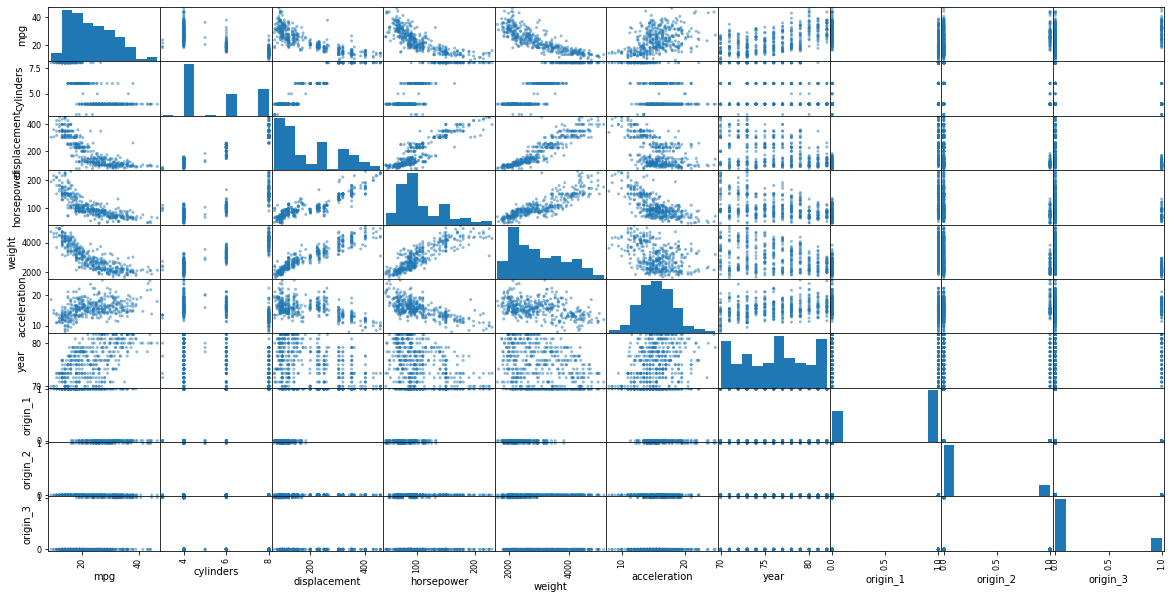

In [9]:
# numeric_df = auto_df.drop('name', axis=1)
# sns.pairplot(numeric_df)
plt.rcParams["figure.figsize"] = [20, 10]
pd.plotting.scatter_matrix(auto_df)

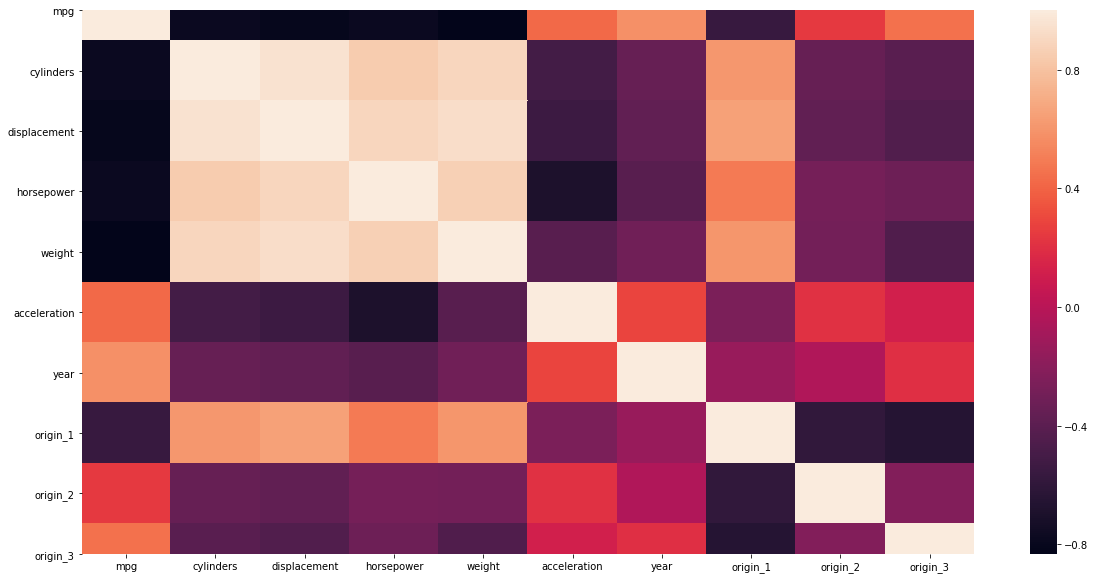

In [10]:
corr_mat = auto_df.corr()
sns.heatmap(corr_mat)

## c) Linear Regression (Part II)

In [11]:
numeric_features = list(auto_df.columns)
numeric_features.remove('mpg')
numeric_features.remove('name')
response = ['mpg']

X = auto_df[numeric_features]
y = auto_df[response]

In [12]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              572.4
Date:                Thu, 07 Nov 2019   Prob (F-statistic):                    1.43e-72
Time:                        17:05:51   Log-Likelihood:                         -1287.3
No. Observations:                 313   AIC:                                      2577.
Df Residuals:                     312   BIC:                                      2580.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1799      0.008     23.926      0.000       0.165       0.195
==============================================================================
Omnibus:                       13.778   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.160
Skew:                          -0.231   Prob(JB):                       0.0169
Kurtosis:                       2.358   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Try defining different models with patsy library, use symbols +, *, : and different transformations of the variables like for exampleI(np.log(X))orI(np.sqrt(X)). Forwhich model you get the best generalization error?

In [13]:
numeric_columns = list(auto_df.columns)
numeric_columns.remove('name')

In [14]:
def perform_prediction_with_formula(formula, data):
    model = ols(formula=formula, data=data)
    return model.fit()

In [15]:
result_1 = perform_prediction_with_formula('mpg ~ horsepower', auto_df[numeric_columns])
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           7.03e-81
Time:                        17:05:51   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
result_2 = perform_prediction_with_formula('mpg ~ I(np.log(horsepower) + weight) + cylinders + year', auto_df[numeric_columns])
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     545.7
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          8.53e-139
Time:                        17:05:51   Log-Likelihood:                -1037.3
No. Observations:                 392   AIC:                             2083.
Df Residuals:                     388   BIC:                             2099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -13.8790      4.066     -3.413      0.001     -21.873      -5.885
I(np.log(horsepower) + weight)    -0.0064      0.000    -13.749      0.000      -0.007      -0.005
cylinders                         -0.1511      0.234     -0.646      0.518      -0.611       0.308
year                               0.7519      0.050     14.987      0.000       0.653       0.851
==============================================================================
Omnibus:                       43.311   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.993
Skew:                           0.678   Prob(JB):                     8.56e-17
Kurtosis:                       4.641   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
result_3 = perform_prediction_with_formula('mpg ~ cylinders * displacement * horsepower + weight - acceleration + year + origin_1 + origin_2 + origin_3', auto_df[numeric_columns])
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     220.1
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          2.70e-157
Time:                        17:05:51   Log-Likelihood:                -969.63
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     380   BIC:                             2011.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            10.1492      7.119      1.426      0.155      -3.848      24.147
cylinders                            -3.5451      1.657     -2.140      0.033      -6.803      -0.288
displacement                         -0.1413      0.067     -2.110      0.035      -0.273      -0.010
cylinders:displacement                0.0147      0.009      1.642      0.101      -0.003       0.032
horsepower                           -0.3397      0.089     -3.806      0.000      -0.515      -0.164
cylinders:horsepower                  0.0329      0.015      2.253      0.025       0.004       0.062
displacement:horsepower               0.0013      0.001      1.921      0.056   -3.07e-05       0.003
cylinders:displacement:horsepower    -0.0001   8.64e-05     -1.544      0.124      -0.000    3.65e-05
weight                               -0.0042      0.001     -7.314      0.000      -0.005      -0.003
year                                  0.7537      0.046     16.525      0.000       0.664       0.843
origin_1                              2.5261      2.413      1.047      0.296      -2.218       7.270
origin_2                              3.6395      2.377      1.531      0.127      -1.034       8.313
origin_3                              3.9837      2.387      1.669      0.096      -0.710       8.677
==============================================================================
Omnibus:                       37.053   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.466
Skew:                           0.560   Prob(JB):                     8.24e-16
Kurtosis:                       4.732   Cond. No.                     2.46e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
models_mse = pd.DataFrame({'Model 1': [result_1.mse_model], 'Model 2': [result_2.mse_model], 'Model 3': [result_3.mse_model]}, index=['Initial dataset'])
models_mse

,Model 1,Model 2,Model 3
Initial dataset,14433.077597,6418.517232,1871.662418


# Outliers and High Leverage Points

Outlier - a data point whose response y does not follow the general trend of
the rest of the data.

High Leverage Point - a data point has high leverage if it has ”extreme” predictor x values.

In [19]:
numeric_df = auto_df[numeric_columns]

def compute_z_score(dataframe):
    return (np.abs(stats.zscore(dataframe)))

a = compute_z_score(numeric_df)
no_outliers = numeric_df[(compute_z_score(numeric_df) < 3).all(axis=1)]

In [20]:
no_outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
391,27.0,4,151.0,90.0,2950,17.3,82,1,0,0
392,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
395,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [21]:
result_1 = perform_prediction_with_formula('mpg ~ horsepower', no_outliers[numeric_columns])
result_2 = perform_prediction_with_formula('mpg ~ I(np.log(horsepower) + weight) + cylinders + year', no_outliers[numeric_columns])
result_3 = perform_prediction_with_formula('mpg ~ cylinders * displacement * horsepower + weight - acceleration + year + origin_1 + origin_2 + origin_3', no_outliers[numeric_columns])

In [22]:
no_outliers_models_mse = pd.DataFrame({'Model 1': [result_1.mse_model], 'Model 2': [result_2.mse_model], 'Model 3': [result_3.mse_model]}, index=['No outliers dataset'])
models_mse.append(no_outliers_models_mse)

,Model 1,Model 2,Model 3
Initial dataset,14433.077597,6418.517232,1871.662418
No outliers dataset,14229.566372,6187.635104,1797.770667


Model error is smaller in case of high leverage points